### 統計學習與深度學習（Fall, 2025）
### Homework 2

請將 IPYNB 檔與 IPYNB Export 之 HTML 檔上傳至 COOL 作業區。作業自己做。嚴禁抄襲。不接受紙本繳交，不接受遲交。請以英文或中文作答。
如無其他規定，所有重要結果應顯示至小數點第四位（四捨五入）。本次作業禁止使用 Auto-SKlearn 或其他 AutoML 工具。題目可能有額外實作限制。違反規定者該題以零分計算。


### 第一題 [Logistic Regression: Probability, Loss, Gradient, and Weights]

Logistic regression (LR) 是一個常用的分類模型。我們將在這個題目中透過練習熟悉一些 LR 的細節與特性。

本題將利用 UCI 的 "Adult" dataset <https://archive.ics.uci.edu/ml/datasets/Adult> 來練習資料前處理。我們使用這個資料集的方式是用來建構預測最後一個收入欄位是 '>50K' 或 '<=50K'。這個資料集已經先切好了 Training 跟 Test。Training 又切分為 Subtraining 與 Validation 兩個不重疊的集合。

請直接使用作業附帶的資料檔 **adult_m50kv2.pickle**。讀取的方式為：

In [1]:
import pickle
dsfile = 'adult_m50kv2.pickle'
with open(dsfile, 'rb') as fh1:
    adult50kp = pickle.load(fh1)

這是一個 Dictionary 結構，Keys 有：

In [2]:
adult50kp.keys()

dict_keys(['x_train', 'y_train', 'x_test', 'y_test', 'columnname', 'num_col', 'x_subtrain', 'x_subvalid', 'y_subtrain', 'y_subvalid', 'x_subtrain_ib', 'y_subtrain_ib'])

其中 x_train 與 y_train 為訓練資料，x_test 與 y_test 為測試資料，columname 為欄位名稱，
x_subtrain 與 y_subtrain 為 Subtraining, x_subvalid 與 y_subvalid 為 validation 資料集。

本題的任務如下：

**第一小題** (10%)：實作一個 pred_prob 函數。這個函數的輸入為資料矩陣、LR 的常數項係數與特徵係數，輸出在給定係數下 LR 對各資料點預測屬於各 Class 的機率。本題為 Binary Classification, 因此第一個 Column 為 Class 0, 第二個 Column 為 Class 1 的機率。一般而言，Class 1 稱為 Postive Class, Class 0 稱為 Negative Class。本題 >50K 為 Positive Class。本題禁止直接使用 sklearn 中的實作。你應該使用 Numpy 建構此函數。然而，你可以參考 sklearn 中對此函數的定義 <https://scikit-learn.org/1.5/modules/linear_model.html#binary-case>。你的實作應與此文件一致。

請使用下面 Python 函數定義：

```python
def pred_prob(X, intercept, coefs, twocol = True):
    # Implement your own probability function to predict 
    # the probability in binary logistic regression

```

其中 `X` 為特徵矩陣，每一個 row 為一筆資料，不包含常數項。
`intercept` 為 LR 的常數項係數。
`coefs` 為 K X 1 的係數 Numpy 向量。
`twocol` 為 Boolean。如 True 則回傳的機率矩陣為 N X 2, 第一個 Column 為 P(Y=0 | X) 第二個Column 為 P(Y=1 | X)。如 False 則回傳 N X 1 矩陣的 P(Y=1 | X)。



In [3]:
import numpy as np
def pred_prob(X, intercept, coefs, twocol=True):
    z = np.dot(X, coefs) + intercept
    
    p1 = 1 / (1 + np.exp(-z))  # sigmoid function
    if twocol:
        p0 = 1 - p1
        return np.hstack((p0, p1))
    else:
        return p1

**第二小題** (15%): 實作 LR with L2 Regularization 的 Loss Function。

此 Loss Function 的定義如下

$\frac{1}{S} \sum_{i=1}^{n} -s_i(y_i log(p(X_i) + (1 - y_i) log(1 - p(X_i)) + \frac{1}{2} \frac{w^T w}{S \cdot  C}  $

其中 $P(X_i)$ 為 LR 在目前參數下預測資料點 $i$ 為 Positive Class 的機率。
$w$ 為參數向量（不包含常數項係數）。
$s_i$ 為資料點 $i$ 的權重，$s_i = 1$。
$S = \sum_{i=1}^N s_i$。
$C$ 為 Regularization Coefficient，數值越大則對係數的牽制越小（與課程投影片定義不同）。

本題禁止直接使用 sklearn 中的實作。你應該使用 Numpy 建構此函數。然而，你可以參考 sklearn 中對此函數的定義 <https://scikit-learn.org/1.5/modules/linear_model.html#binary-case>。你的實作應與此文件一致。

請使用下面 Python 函數定義:

```python
def lr_logloss(Xtrain, ytrain, intercept, coefs, C):
    # Implement your own loss function for
    # Logistic Regression with L2 regularization
    
```

其中 `Xtrain` 為特徵矩陣，每一個 row 為一筆資料，不包含常數項。
`ytrain` 為 class label, 數值應為0或1。
`intercept` 為 LR 的常數項係數。
`coefs` 為 K X 1 的係數 Numpy 向量。
`C` 為 regularization coefficient。

In [4]:
def lr_logloss(XTrain, ytrain, intercept, coefs, C):
    """
    Ards:
        XTrain: n x d feature matrix
        ytrain: n x 1 label vector (0/1)
        intercept: scalar
        coefs: d x 1 coefficient vector
        C: regularization parameter
    Returns:
        log loss with L2 regularization
    """
    S = XTrain.shape[0]
    
    # Compute Log Loss
    p1 = pred_prob(XTrain, intercept, coefs, twocol=False)
    
    eplison = 1e-15
    p1 = np.clip(p1, eplison, 1 - eplison)
    
    ytrain_col = ytrain.reshape(-1, 1)
    
    log_loss_sum = -np.sum(ytrain_col * np.log(p1) + (1 - ytrain_col) * np.log(1 - p1))
    avrage_log_loss = log_loss_sum / S
    
    # L2 Regularization
    w_squared_sum = np.sum(coefs ** 2)
    l2_term = (0.5 * w_squared_sum) / (S * C)
    
    # Total Loss
    total_loss = avrage_log_loss + l2_term
    
    return total_loss
    

**第三小題** (10%): 

(1) 使用 sklearn.linear_model.LogisticRegression() 與 Sub-training 資料集學習 LR 參數，印出 Intercept 與各特徵名稱與係數。(2) 將學好的模型應用在Test Dataset，計算 Accuracy, Recall, Precision, F1。可使用 sklearn 實作。務必在最後具體說明題目所要計算的數值。請勿只印出 sklearn 的 output。

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

x_subtrain = adult50kp['x_subtrain']
y_subtrain = adult50kp['y_subtrain']
x_test = adult50kp['x_test']
y_test = adult50kp['y_test']
column_names = adult50kp['columnname']

# Initialize the model
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
print("Training the model...")
lr_model.fit(x_subtrain, y_subtrain)
print("Model training completed!\n")


# (1) Print the Intercept
intercept_val = lr_model.intercept_[0]
print(f"Intercept: {intercept_val:.4f}\n")

# (2) Print the name and coefficient for each feature
coefficients = lr_model.coef_[0]
print("Feature names and their corresponding coefficients:")
print("-" * 30)
for feature, coef in zip(column_names, coefficients):
    print(f"{feature:<20}: {coef:>10.4f}")
print("-" * 30)


# Predict on the test set
y_pred_test = lr_model.predict(x_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)


print("\nModel Evaluation Results on the Test Set:")
print("=" * 50)
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-Score : {f1:.4f}")
print("=" * 50)

Training the model...
Model training completed!

Intercept: -1.5029

Feature names and their corresponding coefficients:
------------------------------
capital-loss        :     0.2566
hours-per-week      :     0.3527
capital-gain        :     2.3682
educational-num     :     0.6930
age                 :     0.3386
fnlwgt              :     0.0810
relationship_Husband:    -0.1697
relationship_Not-in-family:    -0.0530
relationship_Other-relative:    -0.7189
relationship_Own-child:    -1.1709
relationship_Unmarried:    -0.1586
relationship_Wife   :     1.1970
race_Amer-Indian-Eskimo:    -0.5780
race_Asian-Pac-Islander:     0.1654
race_Black          :    -0.2165
race_Other          :    -0.3840
race_White          :    -0.0610
gender_Female       :    -0.9933
gender_Male         :    -0.0808
occupation_Adm-clerical:     0.0280
occupation_Craft-repair:     0.0731
occupation_Exec-managerial:     0.8506
occupation_Farming-fishing:    -0.9402
occupation_Handlers-cleaners:    -0.6231
occupat

**第四小題** (10%): Loss function visualization。

基於前一小題學習出的係數，(1) 畫出在目前 Intercept 附近一單位的 Loss Function (2) 畫出在目前係數零（capital-loss）附近一單位的 Loss Function。

注意: 由於前一個小題學習出的係數已經對 Loss Function 最小化，你畫出的圖應該都是 U 形曲線。


Optimal Intercept found by the model: -1.5029


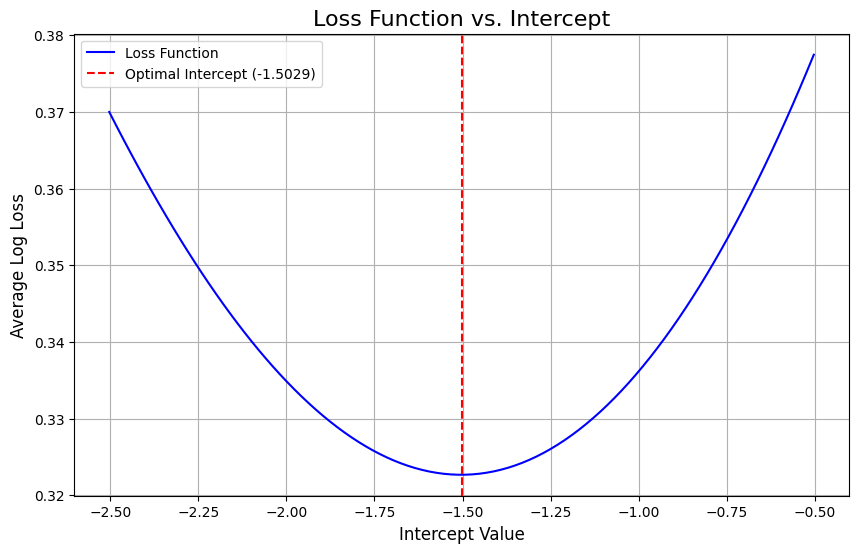


Optimal 'capital-loss' coefficient found by the model: 0.2566


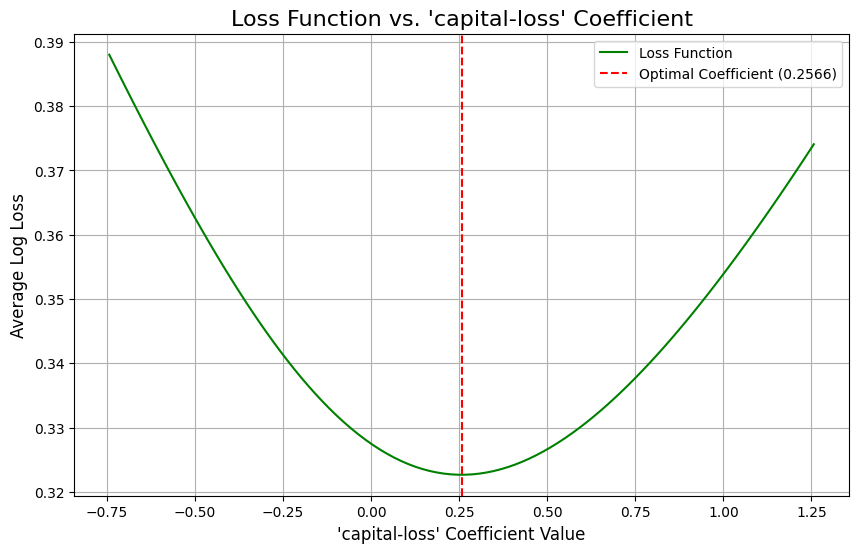

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def pred_prob_for_plot(X, intercept, coefs):
    """Calculate the probability of Class 1 based on the given parameters"""
    z = np.dot(X, coefs) + intercept
    return 1 / (1 + np.exp(-z))

def logloss_for_plot(Xtrain, ytrain, intercept, coefs):
    """Calculate the average Log Loss based on the given parameters"""
    num_samples = Xtrain.shape[0]
    p1 = pred_prob_for_plot(Xtrain, intercept, coefs)
    
    # For numerical stability, to avoid errors caused by log(0)
    epsilon = 1e-15
    p1 = np.clip(p1, epsilon, 1 - epsilon)
    
    ytrain_col = ytrain.reshape(-1, 1)
    
    # Calculate the average Log Loss
    average_log_loss = -np.sum(ytrain_col * np.log(p1) + (1 - ytrain_col) * np.log(1 - p1)) / num_samples
    return average_log_loss


# Get the optimized Intercept and Coefficients from the trained model
opt_intercept = lr_model.intercept_[0]
opt_coefs = lr_model.coef_[0].reshape(-1, 1)

print(f"Optimal Intercept found by the model: {opt_intercept:.4f}")

intercept_range = np.linspace(opt_intercept - 1, opt_intercept + 1, 100)
loss_values_intercept = []

# Fix the coefficients, vary only the Intercept, and calculate the corresponding Loss for each point
for intercept_val in intercept_range:
    loss = logloss_for_plot(x_subtrain, y_subtrain, intercept_val, opt_coefs)
    loss_values_intercept.append(loss)

# Chart 1
plt.figure(figsize=(10, 6))
plt.plot(intercept_range, loss_values_intercept, label='Loss Function', color='blue')
plt.axvline(x=opt_intercept, color='red', linestyle='--', label=f'Optimal Intercept ({opt_intercept:.4f})')
plt.title('Loss Function vs. Intercept', fontsize=16)
plt.xlabel('Intercept Value', fontsize=12)
plt.ylabel('Average Log Loss', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


# 3. (2) Plot the Loss Function for a range of values around the 'capital-loss' coefficient
try:
    # Find the index (column index) of the 'capital-loss' feature
    capital_loss_idx = np.where(column_names == 'capital-loss')[0][0]
    opt_coef_capital_loss = opt_coefs[capital_loss_idx][0]
    print(f"\nOptimal 'capital-loss' coefficient found by the model: {opt_coef_capital_loss:.4f}")

    # Create a numerical range of ±1 around the optimal coefficient
    coef_range = np.linspace(opt_coef_capital_loss - 1, opt_coef_capital_loss + 1, 100)
    loss_values_coef = []

    # Fix the Intercept and other coefficients, varying only the 'capital-loss' coefficient
    for coef_val in coef_range:
        temp_coefs = opt_coefs.copy()
        temp_coefs[capital_loss_idx] = coef_val # Only modify the 'capital-loss' coefficient
        loss = logloss_for_plot(x_subtrain, y_subtrain, opt_intercept, temp_coefs)
        loss_values_coef.append(loss)

    # Chart 2
    plt.figure(figsize=(10, 6))
    plt.plot(coef_range, loss_values_coef, label='Loss Function', color='green')
    plt.axvline(x=opt_coef_capital_loss, color='red', linestyle='--', label=f'Optimal Coefficient ({opt_coef_capital_loss:.4f})')
    plt.title("Loss Function vs. 'capital-loss' Coefficient", fontsize=16)
    plt.xlabel("'capital-loss' Coefficient Value", fontsize=12)
    plt.ylabel('Average Log Loss', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

except (ValueError, NameError):
    print("\n[Error] Could not find the 'capital-loss' feature or necessary variables. Please ensure you have fully executed the previous code block to train the 'lr_model'.")

#### Sanity Check

為了幫助同學們自我檢測正確性，在這裡提供幾個關鍵步驟的參考結果。

**第一小題**
```python
# load dataset
dsfile = 'adult_m50kv2.pickle'
with open(dsfile, 'rb') as fh1:
    adult50kp = pickle.load(fh1)

X = adult50kp['x_subtrain'][0:5,]
intercept = -1.5272275
coefs = [0.25950781,  0.34876602,  2.31873776 , 0.78736064,  0.33992389,  0.08704992,
  -0.43884149,  0.06617491, -0.86784172, -1.14138298, -0.0430126,   0.89943298,
  -0.91920029,  0.11168262, -0.20330975, -0.45255335, -0.06209014, -1.1973518,
  -0.32811911,  0.15581135,  0.23931349,  0.97771987, -0.80849467, -0.48881008,
  -0.05761483, -0.61597391, -3.01467409,  0.67615709,  0.82684249,  0.45561501,
   0.78515056,  0.10471469,  0.03536166, -0.18042056, -0.1981496,   0.89739856,
   0.72133736,  0.19974049,  0.02431812, -0.54957554, -0.23797782, -0.19134163,
  -0.08962951, -0.13136345, -0.14984098, -1.82034863,  0.22178759, -0.07676697,
   1.5654472,   0.4801181,  -0.45519986, -2.16013255,  0.56715199, -1.36568413,
  -0.26013768, -0.34160994,  0.30455591,  0.98946547,  0.83849021, -0.55428539,
  -0.01931975,  0.02875685, -0.22012367,  0.165938,    0.24587743, -0.49584621,
   0.27129184,  0.6632467,   1.08311314,  0.355352,    0.23657114, -0.55244221,
  -0.29776791, -0.51492492, -1.08493494, -0.83233382,  0.61660701,  0.38077523,
   0.34522743,  0.10493796,  0.16957889, -0.91882431, -0.07844291, -0.12138313,
  -0.13627414,  0.437241,   -1.40284695,  0.43730002,  0.64656827, -0.12873123,
   0.12363191,  0.30820418, -0.37598606, -0.2384826,  -1.86067539, -0.92314978,
   2.17438484,  1.28232608, -1.05960696, -1.35676708, -0.99932736, -0.64333065]

coefs = np.array(coefs)
coefs = coefs.reshape((-1, 1))
pred_prob(X, intercept, coefs)
```
Output:
```
array([[0.85699649, 0.14300351],
       [0.84396404, 0.15603596],
       [0.54792834, 0.45207166],
       [0.99604068, 0.00395932],
       [0.91956486, 0.08043514]])
```


**第二小題**

```python
Xtrain = adult50kp['x_subtrain']
ytrain = adult50kp['y_subtrain']
lr_logloss(Xtrain, ytrain, intercept, coefs, 1000)
```

Output:
```
0.32275140356935755
```

### (30%) 第二題[Model Evaluation with ROC / AUC]


在這一題中，請你練習實作 ROC 曲線與 AUC 的計算，並透過 Validation set 選出最佳的 threshold，最後在 Test set 上回報各項分類指標。禁止使用 `sklearn.metrics.roc_curve`、`sklearn.metrics.auc` 等現成函式，你必須自行實作相關計算。允許使用的套件包括 `numpy`、`pandas`、`matplotlib`，以及 `sklearn.linear_model.LogisticRegression`（僅能用於模型訓練與取得 `predict_proba` 輸出）。資料請使用與第一題相同的 `adult_m50kv2.pickle`，其中提供 subtrain、subvalid 與 test 的分割。

(10%) (1) 在 subtrain 上訓練一個 logistic regression 模型，並利用 validation set 的 `predict_proba` 輸出計算 ROC 曲線。請自行撰寫函式，掃描一系列 threshold，計算出對應的 TPR 與 FPR，繪製 ROC curve，並標出隨機猜測的對角線。你需要額外列印前五個 threshold 的數值及其 TPR、FPR 以供檢查。

(10%) (2) AUC 計算

根據前一小題得到的 ROC 點列，自行使用梯形法則 (trapezoidal rule) 計算 AUC，並輸出。

**補充說明**：AUC（Area Under the ROC Curve）是 ROC 曲線下方的面積，代表分類器對樣本排序的能力。實際上，這個面積無法用單一公式直接計算，因此我們通常將 ROC 曲線看作由一系列離散點組成，然後用 **梯形法則 (trapezoidal rule)** 來近似積分。其核心想法是將相鄰的兩個點 $(f_i, t_i)$、$(f_{i+1}, t_{i+1})$ 之間的面積近似為一個梯形，並將所有梯形的面積加總。

梯形法則計算 AUC 的公式為：

$$
\mathrm{AUC}\;\approx\;\sum_{i=0}^{n-1}\bigl(f_{i+1}-f_i\bigr)\cdot\frac{t_i+t_{i+1}}{2}
$$

其中：
- $f_i$：第 $i$ 個點的 False Positive Rate (FPR)
- $t_i$：第 $i$ 個點的 True Positive Rate (TPR)
- 點需依照 FPR 的遞增順序排列

請實作程式完成 AUC 的計算，並回報數值結果。

(10%) (3) 將 threshold 固定成 0.2，應用於 test set。請回報 Test set 上的 Accuracy、Precision、Recall 與 F1。


Training the model...
Model training completed!

TPR and FPR for the First Five Thresholds:
Threshold    | TPR          | FPR         
----------------------------------------
1.0000       | 0.0000       | 0.0000      
0.9800       | 0.0771       | 0.0004      
0.9900       | 0.0656       | 0.0004      
0.9600       | 0.1080       | 0.0008      
0.9700       | 0.0938       | 0.0008      


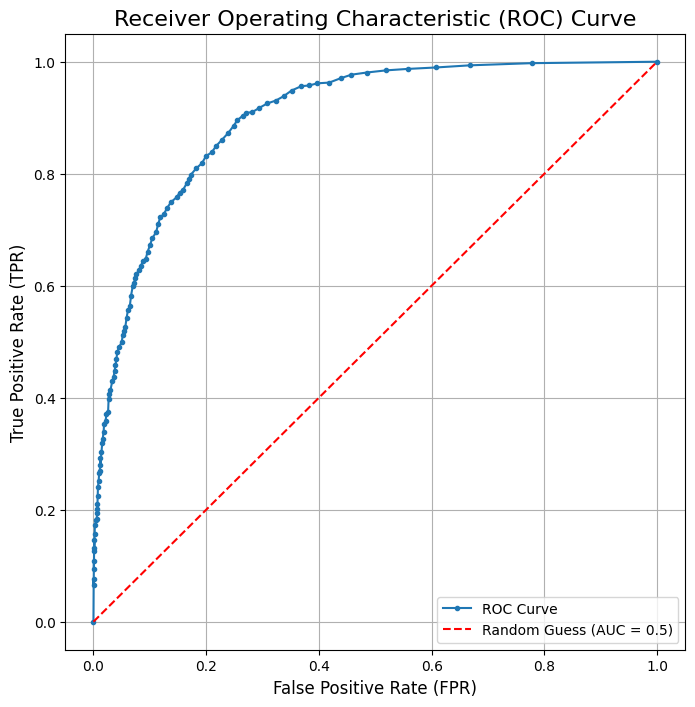

In [7]:
x_subtrain = adult50kp['x_subtrain']
y_subtrain = adult50kp['y_subtrain']
x_subvalid = adult50kp['x_subvalid']
y_subvalid = adult50kp['y_subvalid']

lr_model_roc = LogisticRegression(max_iter=1000, random_state=42)
print("Training the model...")
lr_model_roc.fit(x_subtrain, y_subtrain)
print("Model training completed!\n")

# Get predicted probabilities for the positive class on the validation set
y_pred_proba_valid = lr_model_roc.predict_proba(x_subvalid)[:, 1]

def calculate_roc_points_manual(y_true, y_proba):
    """
    Calculate ROC curve points (FPR, TPR) for various thresholds
    """
    thresholds = np.linspace(0, 1, 101)  # 
    roc_points = []

    for th in thresholds:
        y_pred = (y_proba >= th).astype(int)
        
        tp = np.sum((y_true == 1) & (y_pred == 1))
        tn = np.sum((y_true == 0) & (y_pred == 0))
        fp = np.sum((y_true == 0) & (y_pred == 1))
        fn = np.sum((y_true == 1) & (y_pred == 0))

        # Calculate TPR and FPR
        tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
        fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
        roc_points.append((fpr, tpr, th))

    # Sort by FPR
    roc_points.sort(key=lambda x: x[0])
    return roc_points

# Calculate ROC curve points
roc_curve_points = calculate_roc_points_manual(y_subvalid, y_pred_proba_valid)

print("TPR and FPR for the First Five Thresholds:")
print("=" * 40)
print(f"{'Threshold':<12} | {'TPR':<12} | {'FPR':<12}")
print("-" * 40)
for fpr, tpr, th in roc_curve_points[:5]:
    print(f"{th:<12.4f} | {tpr:<12.4f} | {fpr:<12.4f}")
print("=" * 40)

# Plot ROC Curve
fpr_values = [p[0] for p in roc_curve_points]
tpr_values = [p[1] for p in roc_curve_points]

plt.figure(figsize=(8, 8))
plt.plot(fpr_values, tpr_values, marker='.', label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Guess (AUC = 0.5)') # Random Guess Line
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# (2)
def calculate_auc_trapezoidal(fpr_list, tpr_list):
    """
    Caculate by the trapezoidal rule
    """
    fpr = np.array(fpr_list)
    tpr = np.array(tpr_list)
    
    # Calculate AUC using the trapezoidal rule
    auc = np.sum((fpr[1:] - fpr[:-1]) * (tpr[:-1] + tpr[1:]) / 2)
    return auc

auc_value = calculate_auc_trapezoidal(fpr_values, tpr_values)

print(f"\nAUC by trapezoidal rules: {auc_value:.4f}")



AUC by trapezoidal rules: 0.9014


In [9]:
# (3)
def manual_metrics(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    
    accuracy = (tp + tn) / (tp + tn + fp + fn) if (tp + tn + fp + fn) > 0 else 0
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    return accuracy, precision, recall, f1

# evaluate on the test set with threshold = 0.2
x_test = adult50kp['x_test']
y_test = adult50kp['y_test']

# positive class probability
y_pred_proba_test = lr_model_roc.predict_proba(x_test)[:, 1]

fixed_threshold = 0.2
y_pred_test_fixed_th = (y_pred_proba_test >= fixed_threshold).astype(int)

accuracy, precision, recall, f1 = manual_metrics(y_test, y_pred_test_fixed_th)

print("=" * 50)
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-Score : {f1:.4f}")
print("=" * 50)

Accuracy : 0.7825
Precision: 0.5347
Recall   : 0.8857
F1-Score : 0.6668


### 第三題 [Forward Feature Selection] 

注意: 本題禁用現成的 Feature Selection Pipeline, 如 sklearn.feature_selection.SelectFromModel()

(25%) Forward Feature Selection 是一個常見的 Model-based Feature Selection Method。方法在概念上單純，但在實作上各異。我們在這裡練習一個使用 Train-Valid-Test Split的Forward Feature Selection作法。這個作法使用 Validation Set 決定要把那個 Feature 加入。並在 Validation Set 的Performance 不再進步時即停止整個程序。

較詳細的作法如下:

* Let 𝑀_0 denote the null model (no predictors); M_k = the model with k predictors (i.e., features); p = number of features
* For Step k=0, 1, 2, …, 𝑝−1:
    * Consider all p - k models that augment the predictors in 𝑀_k with one additional predictor. For each possibility; compute the prediction performance (F1 score) on the validation set and select one with the best performance.
    * Stop if the best validation performance no longer increase.

本題的資料集由 pickle file 載入 (A Dictionary):
```python
# load dataset
dsfile = 'adult_m50kv2.pickle'
with open(dsfile, 'rb') as fh1:
    adult50kp = pickle.load(fh1)

```

* training set keys: x_subtrain, y_subtrain
* validation set keys: x_subvalid, y_subvalid
* test set keys: x_test, y_test

為了方便比較，請使用下面的 LR Learner: sklearn.linear_model.LogisticRegression(solver = 'lbfgs', C= 1000, max_iter = 1000, tol=1e-5)

(1) (5%) 總共有多少 Features, 多少 Training, Validation, Test Data?

(2) (5%) 在 Training Set 上訓練，並在 Validation Set 與 Test Set 上計算 F1 Score。

(3) (15%) 使用上面的 Forward Feature Selection 作法，依序報告被選取的特徵與其 Validation F1 Score 與最後所有被選取的特徵的 Test F1 Score。與(2)比較並討論。


In [10]:
x_subtrain = adult50kp['x_subtrain']
y_subtrain = adult50kp['y_subtrain']
x_subvalid = adult50kp['x_subvalid']
y_subvalid = adult50kp['y_subvalid']
x_test = adult50kp['x_test']
y_test = adult50kp['y_test']
column_names = adult50kp['columnname']

num_features = x_subtrain.shape[1]
num_train = x_subtrain.shape[0]
num_valid = x_subvalid.shape[0]
num_test = x_test.shape[0]

print("=" * 30)
print(f"Total number of features    : {num_features}")
print(f"Number of training samples  : {num_train}")
print(f"Number of validation samples: {num_valid}")
print(f"Number of test samples      : {num_test}")
print("=" * 30)

Total number of features    : 102
Number of training samples  : 27000
Number of validation samples: 3162
Number of test samples      : 15060


In [11]:
# f1 score
def f1_score(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    return f1

# initialize the model
lr_baseline = LogisticRegression(solver='lbfgs', C=1000, max_iter=1000, tol=1e-5, random_state=42)

lr_baseline.fit(x_subtrain, y_subtrain)

# Validation Set evaluation
y_pred_valid_baseline = lr_baseline.predict(x_subvalid)
f1_valid_baseline = f1_score(y_subvalid, y_pred_valid_baseline)
print(f"Validation Set F1-Score : {f1_valid_baseline:.4f}")
print("=" * 30)

# Test Set evaluation
y_pred_test_baseline = lr_baseline.predict(x_test)
f1_test_baseline = f1_score(y_test, y_pred_test_baseline)
print(f"Test Set F1-Score : {f1_test_baseline:.4f}")
print("=" * 30)

Validation Set F1-Score : 0.6685
Test Set F1-Score : 0.6619


In [12]:
# --- Forward Feature Selection ---
selected_features_indices = []
remaining_features_indices = list(range(num_features))
best_overall_valid_f1 = 0.0

while len(remaining_features_indices) > 0:
    best_f1_this_round = -1
    best_feature_this_round = -1

    # try adding each remaining feature and evaluate
    for feature_idx in remaining_features_indices:
        current_features_indices = selected_features_indices + [feature_idx]
        
        x_subtrain_subset = x_subtrain[:, current_features_indices]
        x_subvalid_subset = x_subvalid[:, current_features_indices]
        
        model = LogisticRegression(solver='lbfgs', C=1000, max_iter=1000, tol=1e-5, random_state=42)
        model.fit(x_subtrain_subset, y_subtrain)
        
        # evaluate on Validation Set
        y_pred_valid = model.predict(x_subvalid_subset)
        current_f1 = f1_score(y_subvalid, y_pred_valid)
        
        # find the best feature in this round
        if current_f1 > best_f1_this_round:
            best_f1_this_round = current_f1
            best_feature_this_round = feature_idx

    # check if the best feature this round improves the overall F1-Score
    if best_f1_this_round > best_overall_valid_f1:
        best_overall_valid_f1 = best_f1_this_round
        selected_features_indices.append(best_feature_this_round)
        remaining_features_indices.remove(best_feature_this_round)
        
        selected_feature_name = column_names[best_feature_this_round]
        print(f"Selected feature: '{selected_feature_name}' (index: {best_feature_this_round}), "
              f"Validation F1-Score: {best_overall_valid_f1:.4f}")
    else:
        print("\nValidation F1-Score did not improve. Stopping feature selection.")
        break

print("\nFinal selected feature indices:", selected_features_indices)
print("Final selected feature names:", [column_names[i] for i in selected_features_indices])
print("=" * 30)

# --- Train the final model with selected features and evaluate on the Test Set ---
print("\n--- Performance of the Final Model with Selected Features ---")
x_subtrain_final = x_subtrain[:, selected_features_indices]
x_test_final = x_test[:, selected_features_indices]

final_model = LogisticRegression(solver='lbfgs', C=1000, max_iter=1000, tol=1e-5, random_state=42)
final_model.fit(x_subtrain_final, y_subtrain)

y_pred_test_final = final_model.predict(x_test_final)
f1_test_final = f1_score(y_test, y_pred_test_final)

print(f"Test Set F1-Score (after feature selection): {f1_test_final:.4f}")
print("=" * 30)

# Comparison
print(f"Test F1-Score using all features: {f1_test_baseline:.4f}")
print(f"Test F1-Score using Forward Selection ({len(selected_features_indices)} features): {f1_test_final:.4f}")

Selected feature: 'educational-num' (index: 3), Validation F1-Score: 0.3205
Selected feature: 'marital-status_Married-civ-spouse' (index: 97), Validation F1-Score: 0.5532
Selected feature: 'capital-gain' (index: 2), Validation F1-Score: 0.6263
Selected feature: 'occupation_Exec-managerial' (index: 21), Validation F1-Score: 0.6429
Selected feature: 'capital-loss' (index: 0), Validation F1-Score: 0.6546
Selected feature: 'occupation_Other-service' (index: 25), Validation F1-Score: 0.6573
Selected feature: 'occupation_Machine-op-inspct' (index: 24), Validation F1-Score: 0.6611
Selected feature: 'occupation_Adm-clerical' (index: 19), Validation F1-Score: 0.6644
Selected feature: 'native-country_South' (index: 81), Validation F1-Score: 0.6653
Selected feature: 'occupation_Tech-support' (index: 30), Validation F1-Score: 0.6662
Selected feature: 'relationship_Own-child' (index: 9), Validation F1-Score: 0.6676
Selected feature: 'relationship_Other-relative' (index: 8), Validation F1-Score: 0.6

透過 Forward Feature Selection 從原本的 107 個特徵中選出一部分特徵，雖然模型的複雜度因此降低，但測試集上的 F1 分數卻略低於使用所有特徵的模型。<br>
這可能表示被捨棄的特徵仍然包含一些對預測略有幫助的資訊，或是存在某些特徵之間的複雜交互作用，而 Forward Feature Selection 的特性未能捕捉到這些關係。